In [1]:
from util.Dataloader import ImageNet_dataloader
import os

ModuleNotFoundError: No module named 'util'

In [2]:
path = '/data/ssd2/ImageNet/ImageNet_train/'

In [3]:
class_list = os.listdir(path)
class_list.sort()
trainset_path = [path + filepath +'/' for filepath in class_list]

In [4]:
len(trainset_path)

1000

In [5]:
dataset_list = []
for index in range(len(trainset_path)):
    file_list = os.listdir(trainset_path[index])
    for filename in file_list:
        dataset_list.append(trainset_path[index]+filename)

In [6]:
len(dataset_list)

1281167

In [7]:
dataset_list[0]

'/data/ssd2/ImageNet/ImageNet_train/n01440764/n01440764_12498.JPEG'

In [8]:
albumentations_dataset = ImageNet_dataloader(path=dataset_list,input_size=224,training=True)

In [9]:
from torchvision import transforms

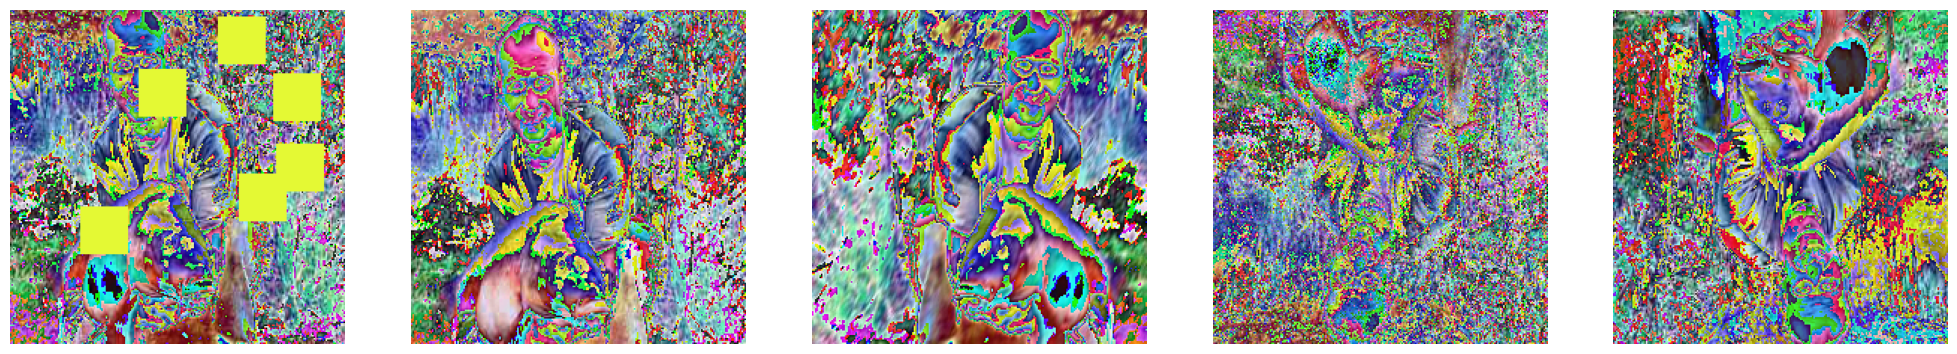

In [10]:
import matplotlib.pyplot as plt
num_samples = 5
fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))
for i in range(num_samples):
    ax[i].imshow(transforms.ToPILImage()(albumentations_dataset[0]['image']))
    ax[i].axis('off')

In [11]:
import torch
class UnNormalize(object):
    def __init__(self, mean=torch.tensor((0.485, 0.456, 0.406)), std=torch.tensor((0.229, 0.224, 0.225))):
        self.mean = mean.reshape(-1,1,1)
        self.std = std.reshape(-1,1,1)

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        return tensor * self.std + self.mean
            


In [12]:
unNormalization_method = UnNormalize()

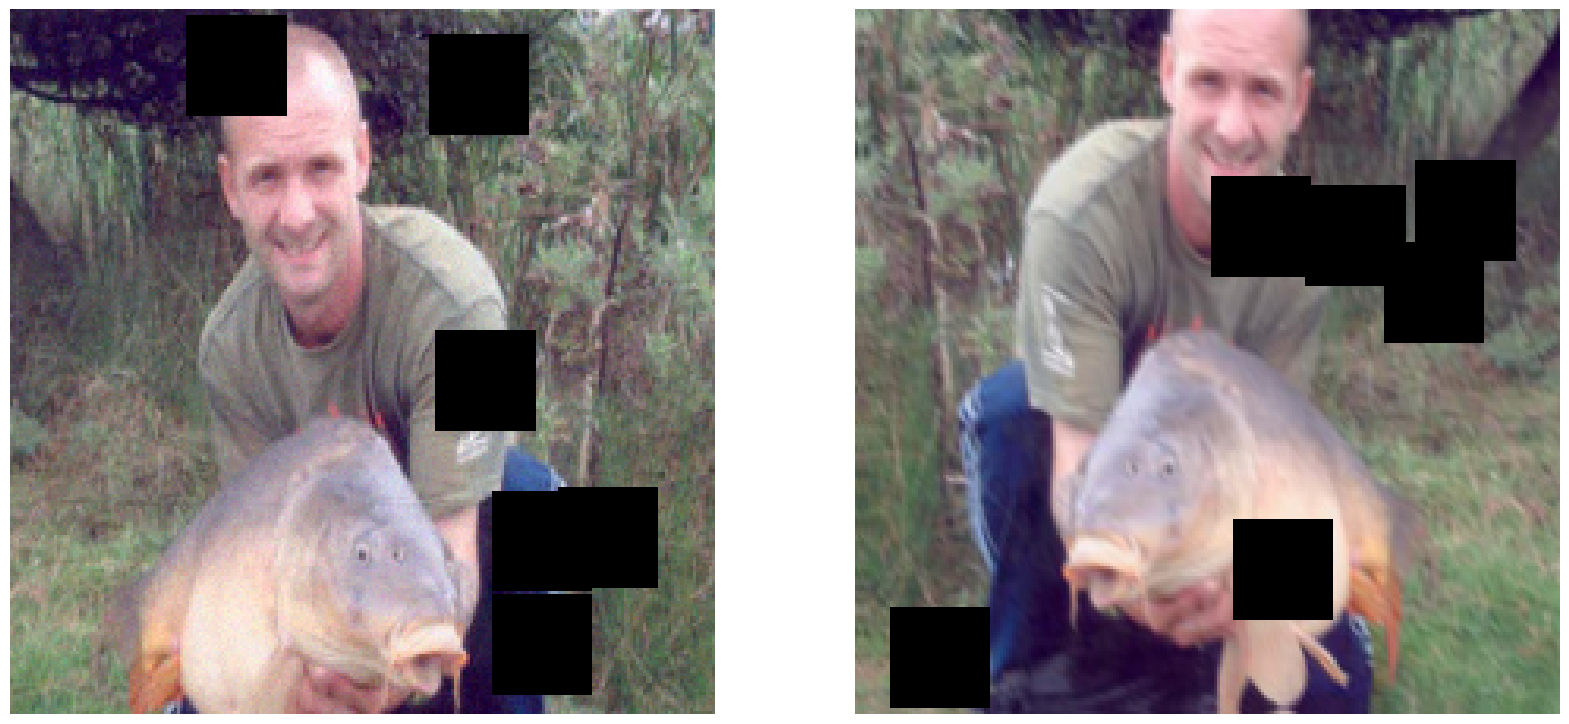

In [13]:
import matplotlib.pyplot as plt
num_samples = 2
fig, ax = plt.subplots(1, num_samples, figsize=(10*num_samples, 10))
for i in range(num_samples):
    ax[i].imshow(transforms.ToPILImage()(unNormalization_method(albumentations_dataset[0]['image'])))
    ax[i].axis('off')

In [14]:
albumentations_dataset = ImageNet_dataloader(path=dataset_list,cutmix_p=1.,beta=1.,input_size=224,training=True)

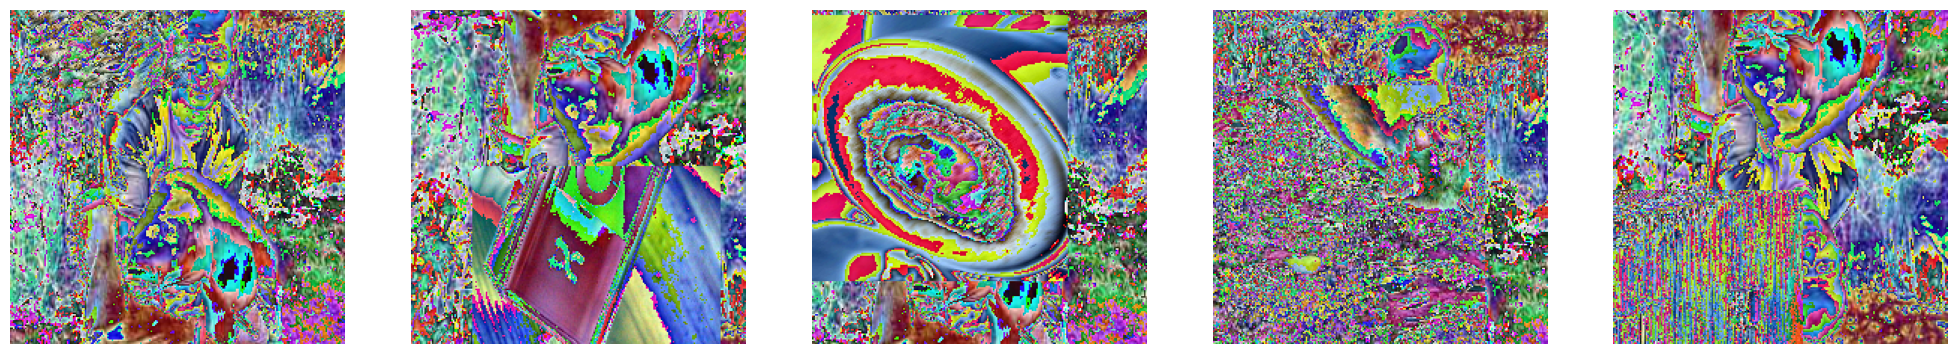

In [15]:
import matplotlib.pyplot as plt
num_samples = 5
fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))
for i in range(num_samples):
    ax[i].imshow(transforms.ToPILImage()(albumentations_dataset[0]['image']))
    ax[i].axis('off')

(tensor([448, 649]),) tensor([0.9513, 0.0487])
(tensor([448, 774]),) tensor([0.8088, 0.1912])


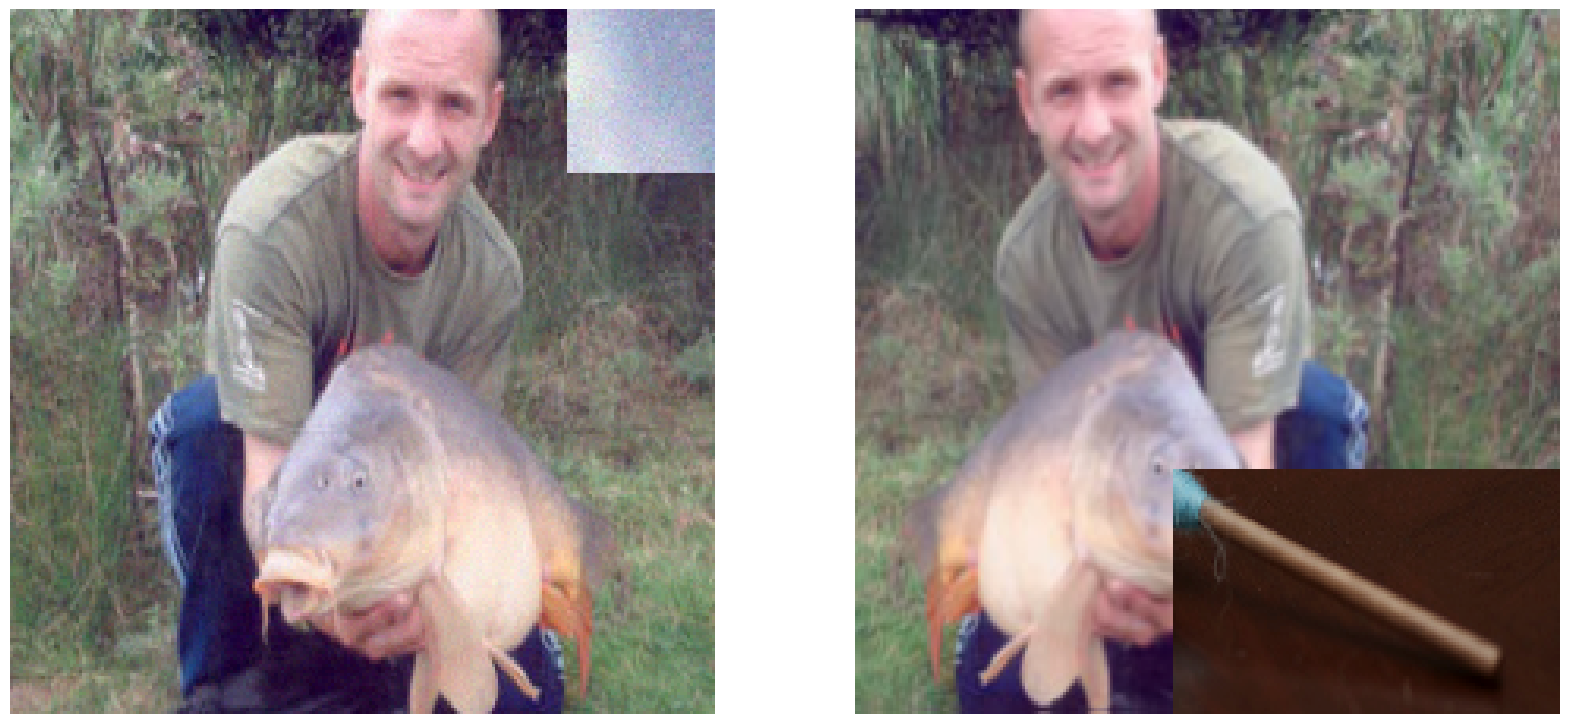

In [28]:
import matplotlib.pyplot as plt
num_samples = 2
fig, ax = plt.subplots(1, num_samples, figsize=(10*num_samples, 10))
for i in range(num_samples):
    data = albumentations_dataset[0]
    image = data['image']
    label = data['label']
    ax[i].imshow(transforms.ToPILImage()(unNormalization_method(image)))
    ax[i].axis('off')
    print(torch.where(label),label[torch.where(label>0)])